In [1]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

# ---------------- Paths ----------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
os.makedirs(DOWNLOADS_DIR, exist_ok=True)

input_path = os.path.join(DOWNLOADS_DIR, "customers_hma_10000_india.csv")
output_path = os.path.join(DOWNLOADS_DIR, "financial_behavior.csv")

# ---------------- Load Data ----------------
if not os.path.exists(input_path):
    raise FileNotFoundError(f"Input file not found: {input_path}")
else:
    print(f"Loaded input file: {input_path}")

customers = pd.read_csv(input_path)
print(f"Total customers loaded: {len(customers)}")

# Simulate for 12 months
months = pd.date_range(start="2024-01-01", periods=12, freq='MS')

# Define customer personas
personas = ['Saver', 'Spender', 'Investor', 'Risk-Taker']

def assign_persona(row):
    """Assign persona based on savings rate and credit score"""
    if row['savings_rate'] > 0.4:
        return 'Saver'
    elif row['credit_score'] < 600:
        return 'Risk-Taker'
    elif row['savings_rate'] < 0.2:
        return 'Spender'
    else:
        return random.choice(personas)

customers['persona'] = customers.apply(assign_persona, axis=1)
print("Personas assigned based on customer profiles.")

# ---------------- Simulation Logic ----------------
behavior_data = []

for idx, row in customers.iterrows():
    cid = row['customer_id']
    persona = row['persona']
    income = row['income']
    balance = row['account_balance']
    loan_balance = row['existing_loan_balance']
    savings_rate = row['savings_rate']

    for month in months:
        # Monthly base income with slight randomness
        monthly_income = np.random.normal(income / 12, income * 0.05 / 12)
        monthly_income = max(monthly_income, 0)

        # Persona-based behavior logic
        if persona == 'Saver':
            spending = monthly_income * np.random.uniform(0.4, 0.6)
            investment = monthly_income * np.random.uniform(0.15, 0.25)
            repayment = monthly_income * np.random.uniform(0.05, 0.1)
        elif persona == 'Spender':
            spending = monthly_income * np.random.uniform(0.7, 0.9)
            investment = monthly_income * np.random.uniform(0.02, 0.08)
            repayment = monthly_income * np.random.uniform(0.02, 0.05)
        elif persona == 'Investor':
            spending = monthly_income * np.random.uniform(0.45, 0.6)
            investment = monthly_income * np.random.uniform(0.25, 0.35)
            repayment = monthly_income * np.random.uniform(0.05, 0.1)
        else:  # Risk-Taker
            spending = monthly_income * np.random.uniform(0.5, 0.7)
            investment = monthly_income * np.random.uniform(0.05, 0.15)
            repayment = monthly_income * np.random.uniform(0.0, 0.05)

        # Calculate savings and update loan balance
        savings = monthly_income - (spending + investment + repayment)
        loan_balance = max(loan_balance - repayment, 0)

        # Update account balance (includes 5% investment growth)
        balance += savings - spending - repayment + investment * 0.05

        # Store record
        behavior_data.append({
            'customer_id': cid,
            'month': month.strftime('%Y-%m'),
            'persona': persona,
            'income': round(monthly_income, 2),
            'spending': round(spending, 2),
            'savings': round(savings, 2),
            'investments': round(investment, 2),
            'loan_repayment': round(repayment, 2),
            'remaining_loan_balance': round(loan_balance, 2),
            'balance': round(balance, 2)
        })

    # Print progress occasionally
    if (idx + 1) % 1000 == 0:
        print(f"🧾 Processed {idx + 1}/{len(customers)} customers...")

# ---------------- Save Results ----------------
behavior_df = pd.DataFrame(behavior_data)
behavior_df.to_csv(output_path, index=False)

print(f"\n Financial behavior simulation completed successfully!")
print(f"Saved to: {output_path}")
print(f"Total records: {len(behavior_df):,} ({len(customers)} customers × 12 months)")

Loaded input file: C:\Users\user\Downloads\synthetic_data\customers_hma_10000_india.csv
Total customers loaded: 10000
Personas assigned based on customer profiles.
🧾 Processed 1000/10000 customers...
🧾 Processed 2000/10000 customers...
🧾 Processed 3000/10000 customers...
🧾 Processed 4000/10000 customers...
🧾 Processed 5000/10000 customers...
🧾 Processed 6000/10000 customers...
🧾 Processed 7000/10000 customers...
🧾 Processed 8000/10000 customers...
🧾 Processed 9000/10000 customers...
🧾 Processed 10000/10000 customers...

 Financial behavior simulation completed successfully!
Saved to: C:\Users\user\Downloads\synthetic_data\financial_behavior.csv
Total records: 120,000 (10000 customers × 12 months)


Loaded financial behavior data from: C:\Users\user\Downloads\synthetic_data\financial_behavior.csv


C:\Users\user\AppData\Local\Temp\ipykernel_28488\219308881.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='persona', y='spending', data=behavior, estimator='mean', ci=None)


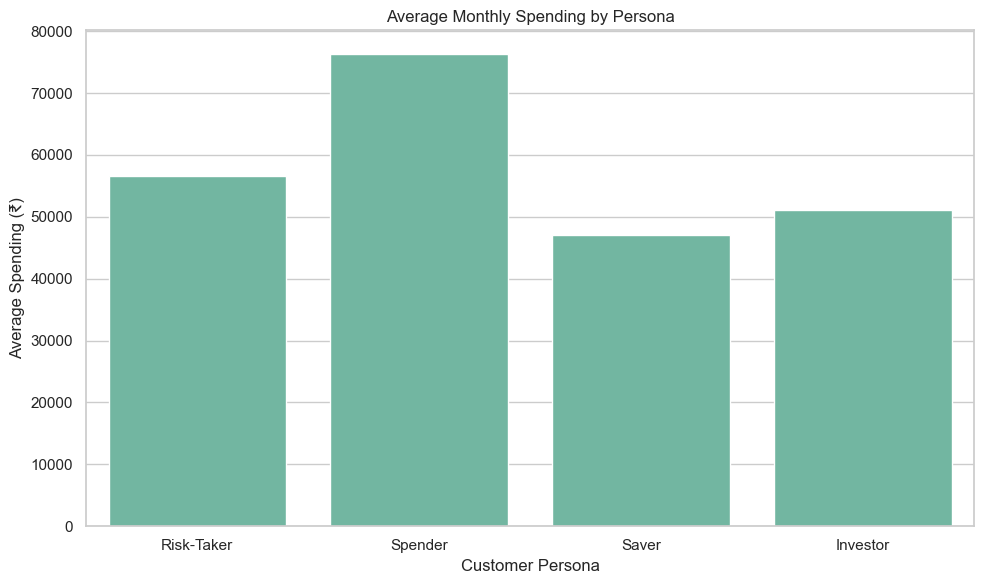

C:\Users\user\AppData\Local\Temp\ipykernel_28488\219308881.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='persona', y='savings', data=behavior, estimator='mean', ci=None)


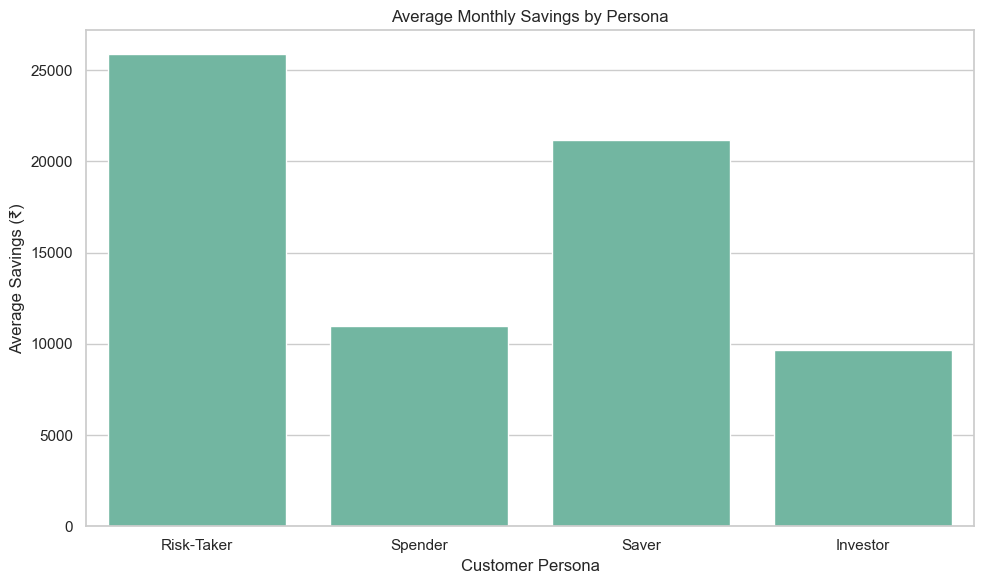

C:\Users\user\AppData\Local\Temp\ipykernel_28488\219308881.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='persona', y='investments', data=behavior, estimator='mean', ci=None)


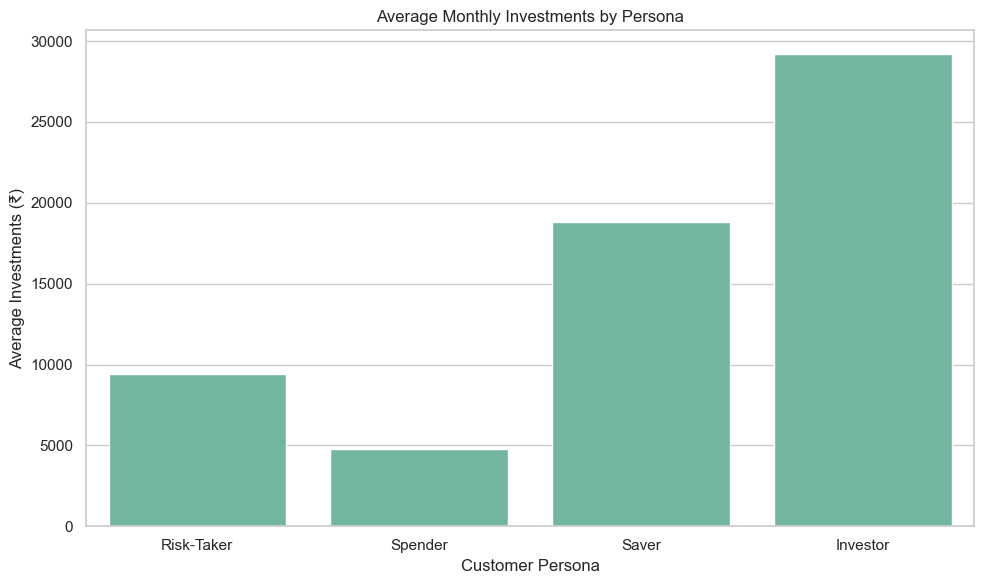

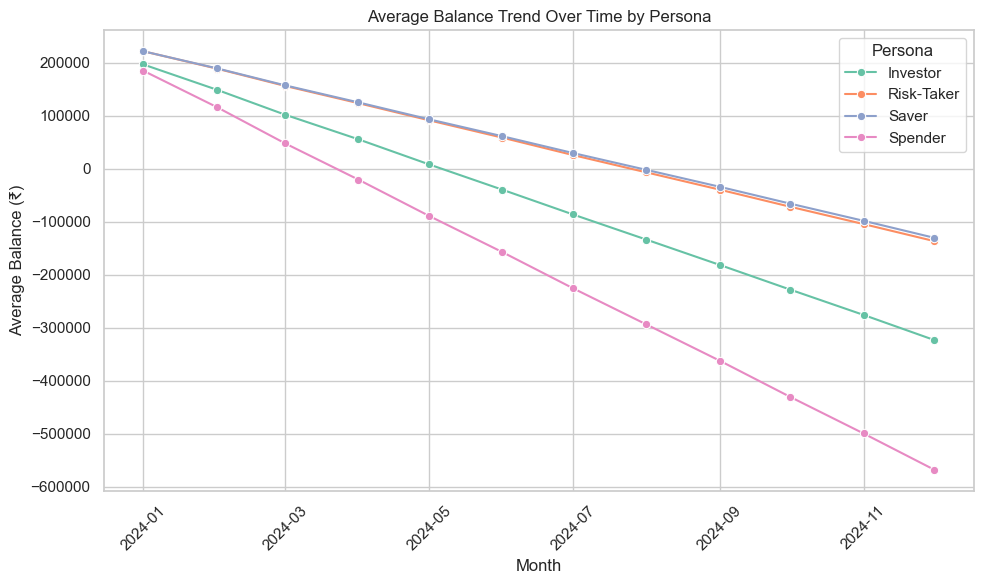

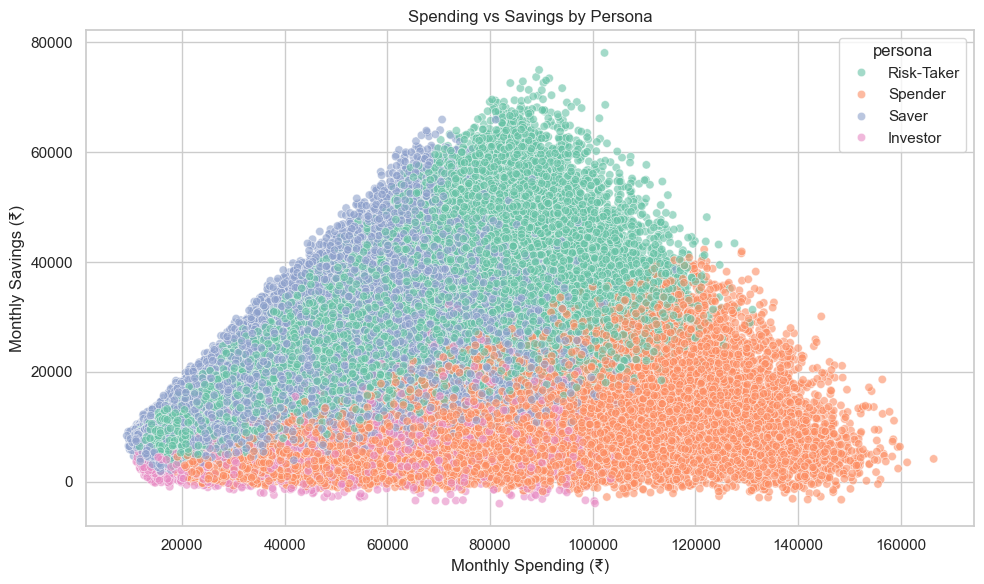

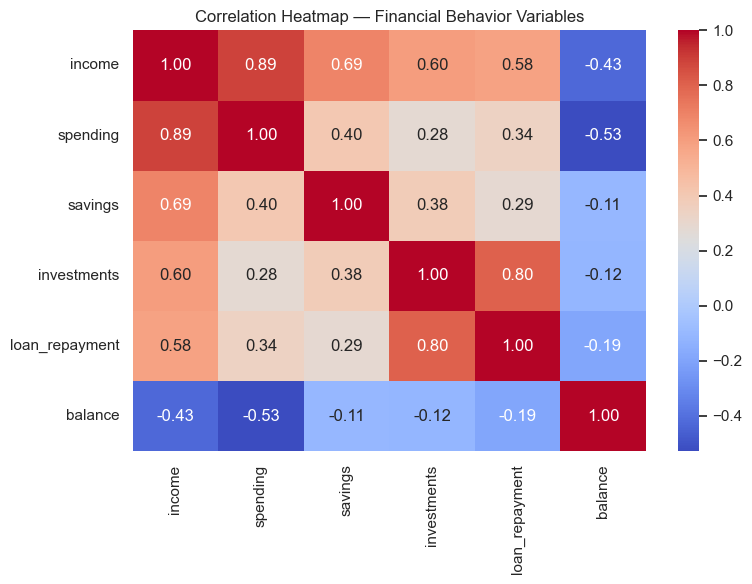

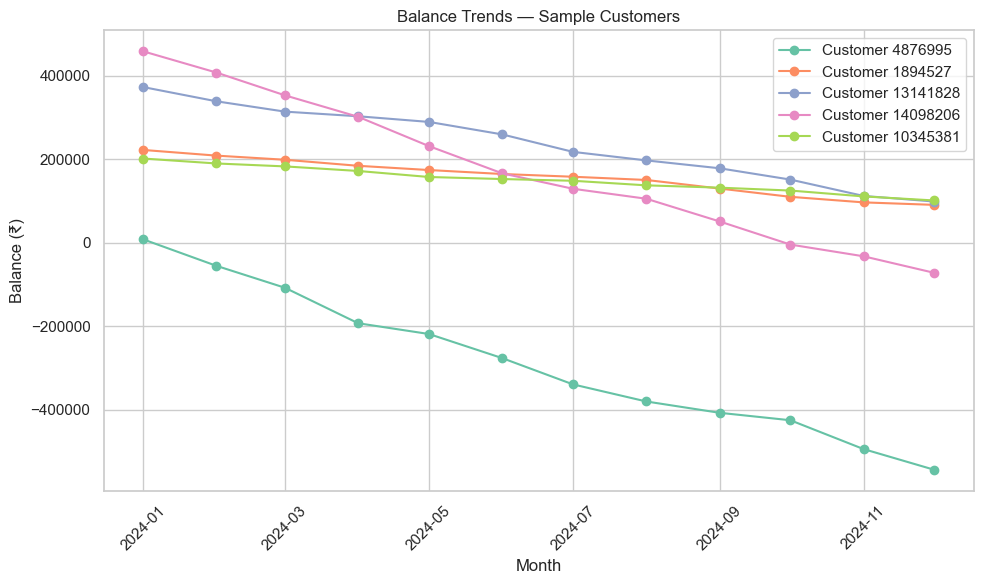

All visuals saved to: C:\Users\user\Downloads\synthetic_data\financial_behavior_visuals


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Paths ----------------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
behavior_path = os.path.join(DOWNLOADS_DIR, "financial_behavior.csv")

# ---------------- Load Data ----------------
if not os.path.exists(behavior_path):
    raise FileNotFoundError(f"File not found: {behavior_path}")
else:
    print(f"Loaded financial behavior data from: {behavior_path}")

behavior = pd.read_csv(behavior_path)

# ---------------- Clean & Prepare Data ----------------
behavior['month'] = pd.to_datetime(behavior['month'], format='%Y-%m')
behavior['persona'] = behavior['persona'].astype(str)

# Configure plot style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

# Create output folder
output_dir = os.path.join(DOWNLOADS_DIR, "financial_behavior_visuals")
os.makedirs(output_dir, exist_ok=True)

# ---------------- Average Monthly Spending by Persona ----------------
plt.figure()
sns.barplot(x='persona', y='spending', data=behavior, estimator='mean', ci=None)
plt.title("Average Monthly Spending by Persona")
plt.xlabel("Customer Persona")
plt.ylabel("Average Spending (₹)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "avg_spending_by_persona.png"), dpi=300)
plt.show()

# ---------------- Average Monthly Savings by Persona ----------------
plt.figure()
sns.barplot(x='persona', y='savings', data=behavior, estimator='mean', ci=None)
plt.title("Average Monthly Savings by Persona")
plt.xlabel("Customer Persona")
plt.ylabel("Average Savings (₹)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "avg_savings_by_persona.png"), dpi=300)
plt.show()

# ---------------- Average Monthly Investments by Persona ----------------
plt.figure()
sns.barplot(x='persona', y='investments', data=behavior, estimator='mean', ci=None)
plt.title("Average Monthly Investments by Persona")
plt.xlabel("Customer Persona")
plt.ylabel("Average Investments (₹)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "avg_investments_by_persona.png"), dpi=300)
plt.show()

# ---------------- Balance Trends Over Time (Persona-level) ----------------
plt.figure()
avg_balance = behavior.groupby(['month', 'persona'])['balance'].mean().reset_index()
sns.lineplot(x='month', y='balance', hue='persona', data=avg_balance, marker='o')
plt.title("Average Balance Trend Over Time by Persona")
plt.xlabel("Month")
plt.ylabel("Average Balance (₹)")
plt.legend(title="Persona")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "balance_trend_by_persona.png"), dpi=300)
plt.show()

# ----------------  Spending vs Savings Relationship ----------------
plt.figure()
sns.scatterplot(x='spending', y='savings', hue='persona', data=behavior, alpha=0.6)
plt.title("Spending vs Savings by Persona")
plt.xlabel("Monthly Spending (₹)")
plt.ylabel("Monthly Savings (₹)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "spending_vs_savings.png"), dpi=300)
plt.show()

# ---------------- Correlation Heatmap ----------------
numeric_cols = ['income', 'spending', 'savings', 'investments', 'loan_repayment', 'balance']
plt.figure(figsize=(8,6))
sns.heatmap(behavior[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap — Financial Behavior Variables")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"), dpi=300)
plt.show()

# ---------------- Sample Customers’ Balance Trends ----------------
plt.figure()
sample_customers = behavior['customer_id'].sample(5).tolist()
for cid in sample_customers:
    df = behavior[behavior['customer_id'] == cid]
    plt.plot(df['month'], df['balance'], marker='o', label=f"Customer {cid}")
plt.title("Balance Trends — Sample Customers")
plt.xlabel("Month")
plt.ylabel("Balance (₹)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "balance_trends_sample_customers.png"), dpi=300)
plt.show()

# ---------------- Summary ----------------
print(f"All visuals saved to: {output_dir}")
